# **Image Data Augmentation**


## 데이터가 부족한 세상으로 떠나기 위한 준비

In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget -O Batman.webp https://github.com/DrKAI/image/raw/main/Batman01.webp

--2023-03-14 05:15:41--  https://github.com/DrKAI/image/raw/main/Batman01.webp
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DrKAI/image/main/Batman01.webp [following]
--2023-03-14 05:15:42--  https://raw.githubusercontent.com/DrKAI/image/main/Batman01.webp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281262 (275K) [image/webp]
Saving to: ‘Batman.webp’

Batman.webp         100%[===================>] 274.67K  --.-KB/s    in 0.02s   

2023-03-14 05:15:42 (11.9 MB/s) - ‘Batman.webp’ saved [281262/281262]



In [3]:
image_org = load_img("Batman.webp")
image = img_to_array(image_org)
image.shape  # height, width, depth

(1600, 1136, 3)

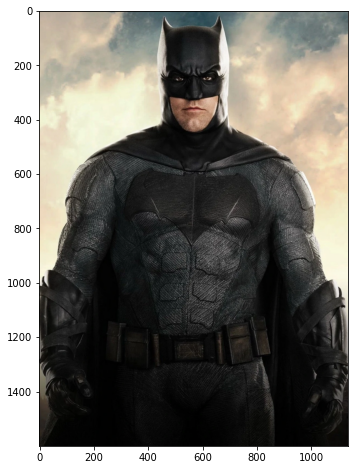

In [6]:
plt.figure(figsize=(12,8))
# plt.imshow(image)
plt.imshow(image/255)
plt.show()

In [7]:
image = np.expand_dims(image, axis=0) # 데이터 개수를 담당할 차원 추가

In [8]:
image.shape

(1, 1600, 1136, 3)

## **ImageDataGenerator**

[전체 옵션 참고](https://keras.io/preprocessing/image/)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
aug = ImageDataGenerator(rotation_range=30,      # 이미지 회전
                         width_shift_range=0.1,  # 이미지 좌우 이동
                         height_shift_range=0.1, # 이미지 상하 이동
                         zoom_range=0.2,         # 확대/축소 범위
                         shear_range=0.2,        # 비스듬히 늘림
                         horizontal_flip=True,   # 가로 전환
                         vertical_flip=True,     # 세로 전환           
                         fill_mode='nearest')    # 마지막 옵션 주의하자. 이미지 회전, 이동, 축소할 때 발생하는 공간을 채우는 방식

In [11]:
imageGen = aug.flow(image, # 이미지 어레이를 받아서.
                    batch_size=1,
                    save_to_dir='output',
                    save_prefix='image',
                    save_format='jpg' )

In [12]:
!mkdir output

In [13]:
!ls output

In [14]:
total = 0

for image in imageGen:
    # 루프가 돌면서 이미지가 한장씩 생성된다.
    total += 1
    # 10장 채우면 멈추자
    if total == 20:
        break

In [15]:
!ls output

image_0_1415.jpg  image_0_1952.jpg  image_0_3507.jpg  image_0_6364.jpg
image_0_1564.jpg  image_0_2598.jpg  image_0_354.jpg   image_0_6466.jpg
image_0_1585.jpg  image_0_2722.jpg  image_0_3585.jpg  image_0_8151.jpg
image_0_1770.jpg  image_0_2954.jpg  image_0_4942.jpg  image_0_941.jpg
image_0_1788.jpg  image_0_3354.jpg  image_0_5258.jpg  image_0_9865.jpg


In [16]:
import os

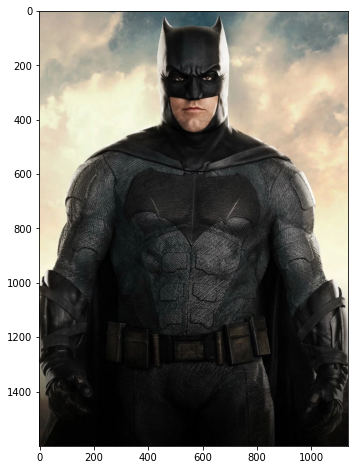

In [17]:
plt.figure(figsize=(12,8))
plt.imshow(image_org) # 아까 것과의 차이는?
plt.show()

In [18]:
os.listdir('output')

['image_0_5258.jpg',
 'image_0_1770.jpg',
 'image_0_354.jpg',
 'image_0_8151.jpg',
 'image_0_3585.jpg',
 'image_0_9865.jpg',
 'image_0_941.jpg',
 'image_0_2722.jpg',
 'image_0_1788.jpg',
 'image_0_3354.jpg',
 'image_0_4942.jpg',
 'image_0_1585.jpg',
 'image_0_1952.jpg',
 'image_0_1415.jpg',
 'image_0_6364.jpg',
 'image_0_2598.jpg',
 'image_0_3507.jpg',
 'image_0_2954.jpg',
 'image_0_1564.jpg',
 'image_0_6466.jpg']

In [19]:
plt.figure(figsize=(20,40))
for i, each in enumerate(os.listdir('output')):
    filepath = './output/' + each

    img = plt.imread(filepath)
    plt.subplot(5, 4, i+1)
    plt.imshow(img)

Output hidden; open in https://colab.research.google.com to view.

--------------

In [42]:
!wget -O dog.jpg https://image.utoimage.com/preview/cp874693/2020/09/202009032160_500.jpg

--2023-03-14 05:50:10--  https://image.utoimage.com/preview/cp874693/2020/09/202009032160_500.jpg
Resolving image.utoimage.com (image.utoimage.com)... 114.203.87.126
Connecting to image.utoimage.com (image.utoimage.com)|114.203.87.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149958 (146K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>] 146.44K   205KB/s    in 0.7s    

2023-03-14 05:50:11 (205 KB/s) - ‘dog.jpg’ saved [149958/149958]



In [43]:
image_org = load_img("dog.jpg")
image = img_to_array(image_org)
image.shape  # height, width, depth

(334, 500, 3)

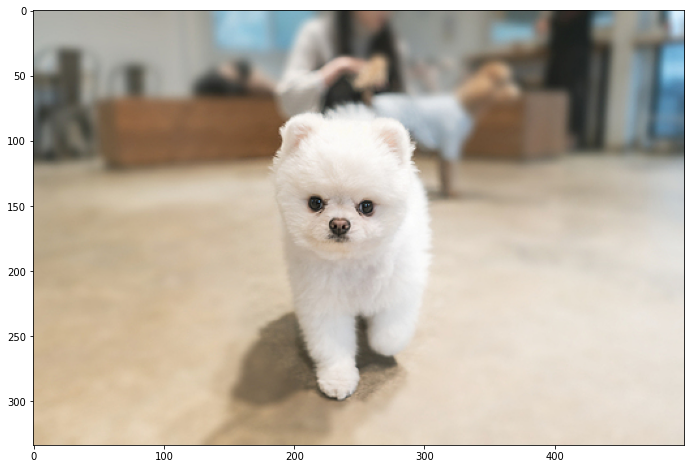

In [44]:
plt.figure(figsize=(12,8))
# plt.imshow(image)
plt.imshow(image/255)
plt.show()

In [45]:
image = np.expand_dims(image, axis=0) # 데이터 개수를 담당할 차원 추가

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=30,      # 이미지 회전
                         width_shift_range=0.1,  # 이미지 좌우 이동
                         height_shift_range=0.1, # 이미지 상하 이동
                         zoom_range=0.2,         # 확대/축소 범위
                         shear_range=0.2,        # 비스듬히 늘림
                         horizontal_flip=True,   # 가로 전환
                         vertical_flip=True,     # 세로 전환           
                         fill_mode='nearest')    # 마지막 옵션 주의하자. 이미지 회전, 이동, 축소할 때 발생하는 공간을 채우는 방식

imageGen = aug.flow(image, # 이미지 어레이를 받아서.
                    batch_size=1,
                    save_to_dir='output_dog',
                    save_prefix='image',
                    save_format='jpg' )
!mkdir output_dog

In [47]:
total = 0

for image in imageGen:
    # 루프가 돌면서 이미지가 한장씩 생성된다.
    total += 1
    # 10장 채우면 멈추자
    if total == 20:
        break

In [48]:
!ls output_dog

image_0_1567.jpg  image_0_4232.jpg  image_0_5822.jpg  image_0_8692.jpg
image_0_1853.jpg  image_0_4254.jpg  image_0_5866.jpg  image_0_894.jpg
image_0_1990.jpg  image_0_4747.jpg  image_0_6255.jpg  image_0_9693.jpg
image_0_267.jpg   image_0_5015.jpg  image_0_7778.jpg  image_0_9777.jpg
image_0_3112.jpg  image_0_5277.jpg  image_0_8327.jpg


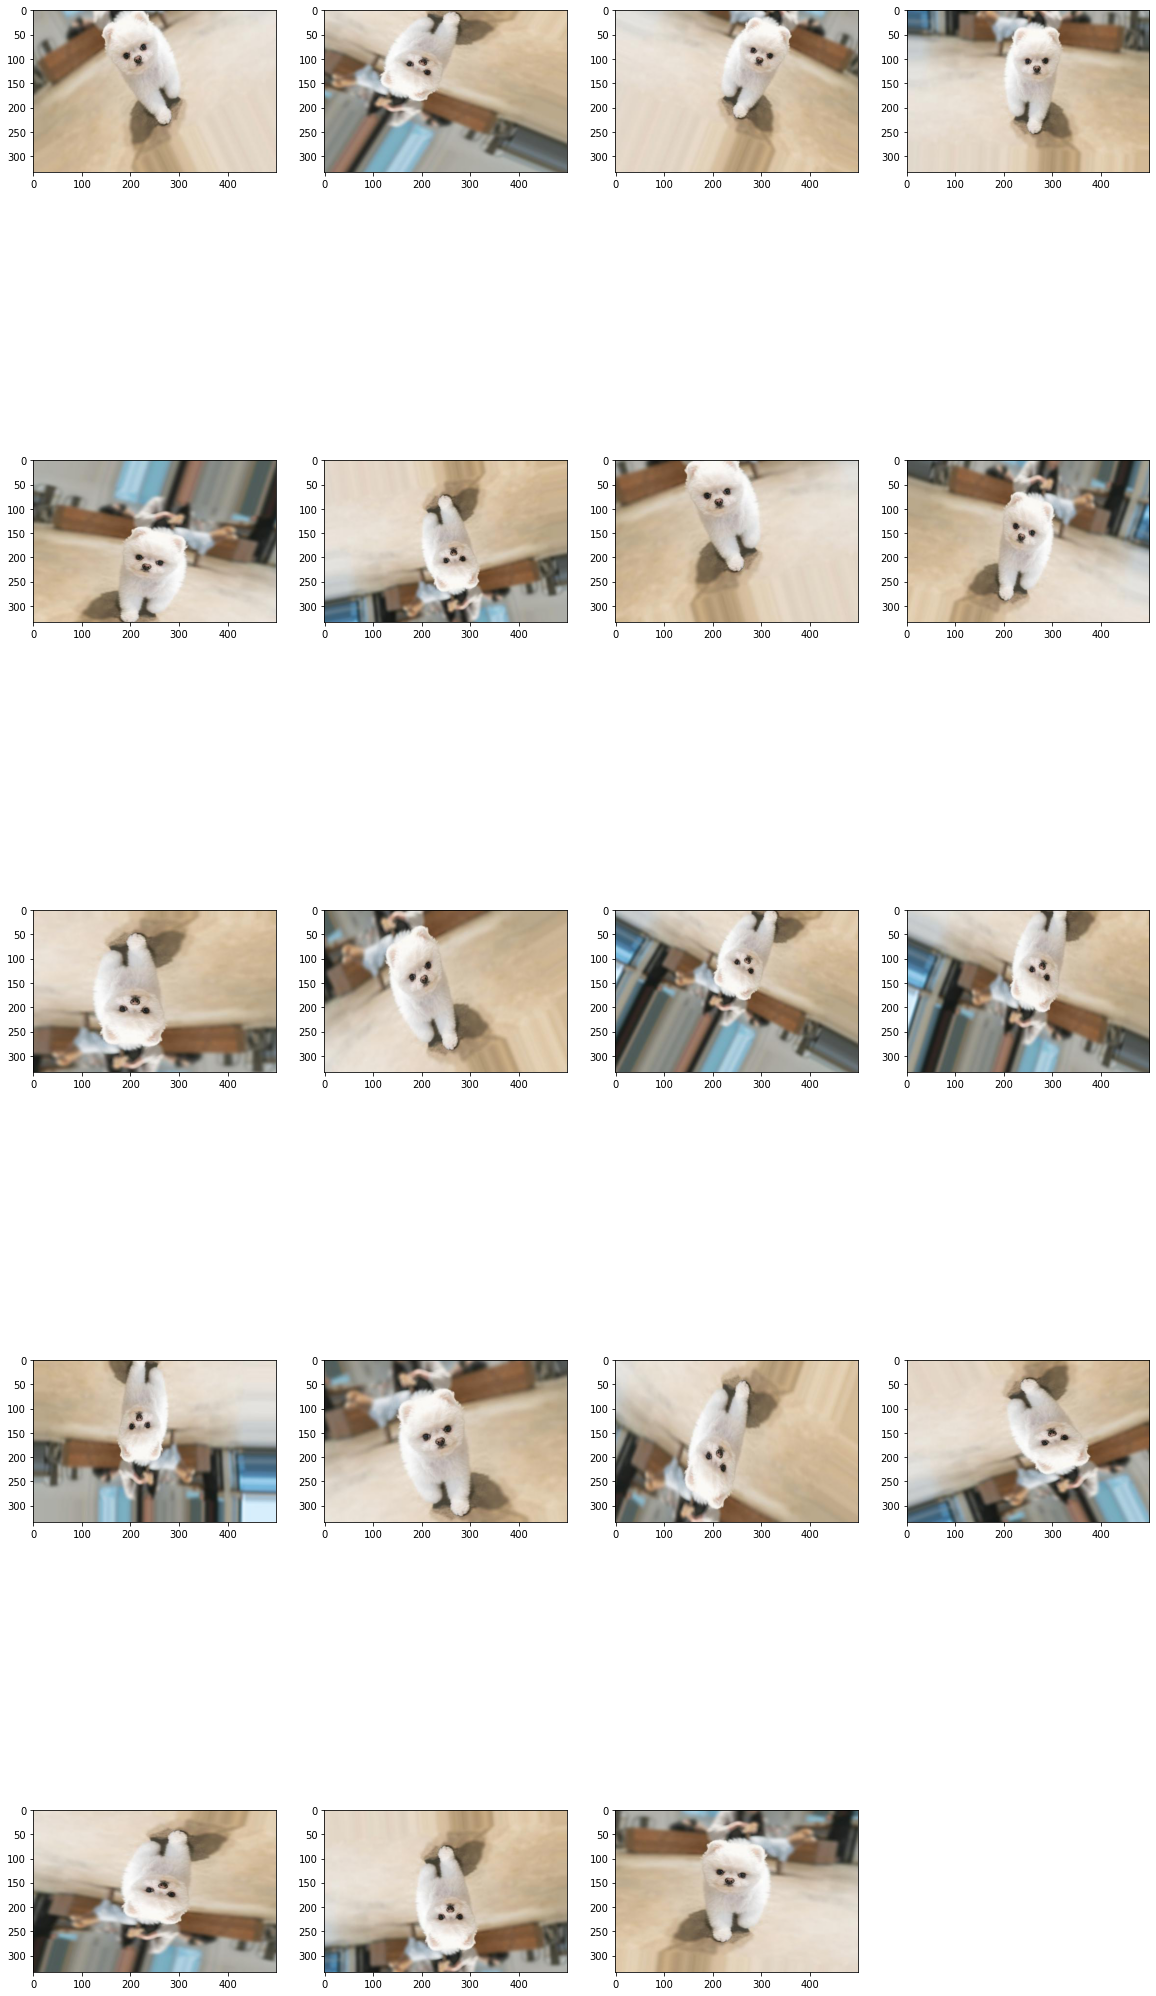

In [49]:
plt.figure(figsize=(20,40))
for i, each in enumerate(os.listdir('output_dog')):
    filepath = './output_dog/' + each

    img = plt.imread(filepath)
    plt.subplot(5, 4, i+1)
    plt.imshow(img)